### Crosshole traveltime tomography
We are doing a crosshole traveltime (e.g. seismics or GPR) tomography.
Assume two boreholes at x=0 and x=10m with source in one and receivers
in the other, in a spacing of 1m.
We discretize the subsurface by a 1x1m regular grid so that we can show
any model matrix just by `matshow`.

In [1]:
# define the grid by the node positions
x = 0:10;
y = 0:11;

We read a readily prepared raypath matrix (pyGIMLi notebook) which is a sparse matrix with the function `readdlm` into the integer positions i and j and the values v and create a sparse matrix.

In [2]:
using DelimitedFiles
using SparseArrays
IJV = readdlm("jacobian.ijv")
J = sparse(IJV[:, 1].+1, IJV[:, 2].+1, IJV[:, 3]);

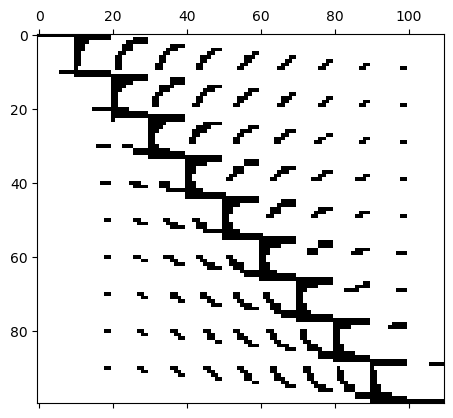

(100, 110)

In [3]:
# First we want to have a look at the matrix entries
using PyPlot
spy(J)
G = Matrix(J)  # make a dense matrix of it
size(G)  # 10x10=100 rays, 11x10=110 model cells

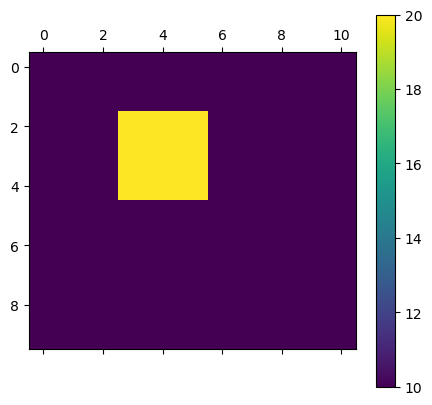

In [4]:
modelSyn = ones(length(x)-1, length(y)-1) * 10  # homogeneous
modelSyn[3:5, 4:6] .= 20  # anomaly
matshow(modelSyn)  # show the model
colorbar();

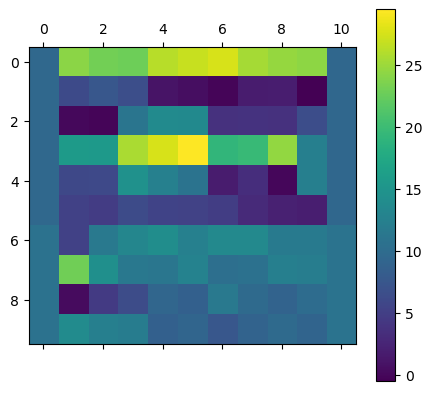

In [5]:
# Next we create synthetic data with some random noise
using LinearAlgebra
d = G * modelSyn[:]
d += randn(size(d)) * 0.1  # try also 0.3, 1, 3, 10
model = ones(size(modelSyn))
model[:] = pinv(G) * d  # fill it like a column
matshow(model)
colorbar();

93 

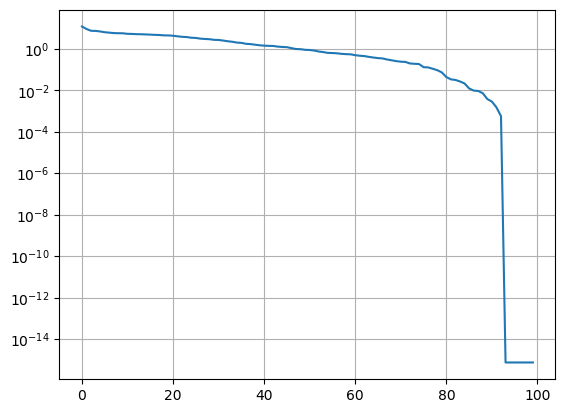

12.256104420332292 0.0005724840682208662

In [6]:
s = svd(G)
semilogy(s.S)
grid()
print(rank(G), " ", s.S[1], " ", s.S[rank(G)])

In [7]:
# The singular value spectrum shows that it is ill-posed
# (i.e. small singular values - steep sv spectrum)

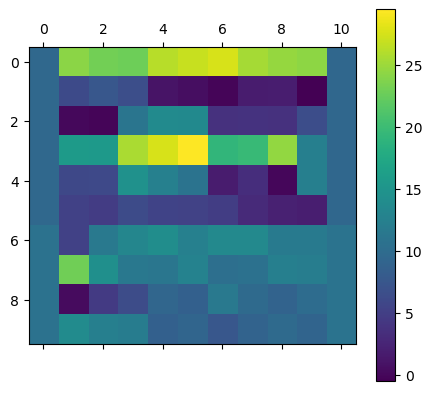

In [8]:
# We try the generalized (SVD) inverse first
model[:] = pinv(G) * d
matshow(model)
colorbar();

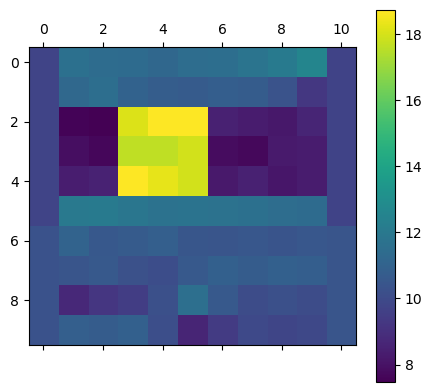

In [9]:
# We truncate small SV by rtol
model[:] = pinv(G, rtol=0.001) * d
matshow(model)
colorbar();

In [10]:
# Let's play interactively
using Interact  # interactive plots
f=figure()
rt = 10 .^ range(-6, 0, step=0.3)
@manipulate for r = -6:0.1:0
    withfig(f) do
        model[:] = pinv(G, rtol=10^r) * d
        imshow(model)
        clim(8, 22)
        colorbar()
    end
end

┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1260


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16322714966577674015\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-4514375508099313763\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16322714966577674015\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["r"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 61,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
31, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Guenther.T\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Guenther.T\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Guenther.T\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Guenther.T\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Guenther.T\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000018e3b0f0, Task (runnable) @0x0000000018e3b0f0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-6.0\",\"-5.9\",\"-5.8\",\"-5.7\",\"-5.6\",\"-5.5\",\"-5.4\",\"-5.3\",\"-5.2\",\"-5.1\",\"-5.0\",\"-4.9\",\"-4.8\",\"-4.7\",\"-4.6\",\"-4.5\",\"-4.4\",\"-4.3\",\"-

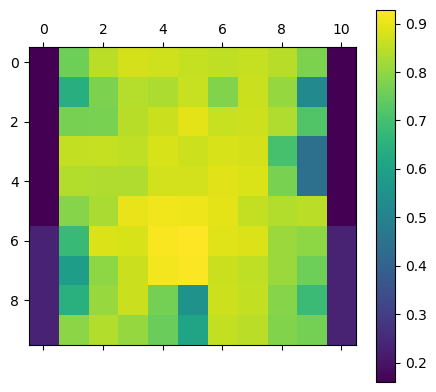

In [11]:
# Let us have a look at the resolution matrix
RM = pinv(G, rtol=0.01) * G
model[:] = diag(RM);
matshow(model);
colorbar();

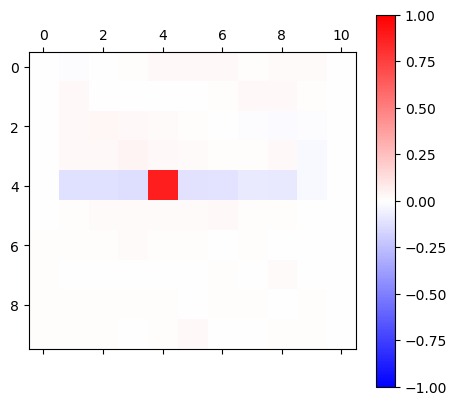

In [12]:
# Lets have a look at one column
model[:] = RM[:, 10*4+5]  # 5th rows, 5th block
matshow(model)
clim(-1, 1)
set_cmap("bwr")
colorbar();

### Tasks Part A 
For or all possible pseudoranks (1-93):

1. Compute the model using the truncated SVD inverse
1. Store the model norm in a vector
1. Store the residual norm in a vector
1. Compute the root-mean-square to the synthetic model

and plot those quantities over p.

Also plot the model norm against the residual norm and choose a `p` from these plots.

Which `p` has to be chosen according to the discrepancy principle?
(Compute the error-weighted misfit)

Repeat the computations for two higher noise levels.

### Damped least squares
We now use the damped least squares solution

$$ {\bf m} = ({\bf G}^T {\bf G} + \lambda^2 {\bf I})^{-1} {\bf d} $$

It can also be expressed by SVD through a filtered sum
$$ {\bf m} = \sum_i \frac{s_i^2}{s_i^2+\lambda^2} \frac{U_i^T{\bf d}}{s_i} V_i = f_i \frac{U_i^T{\bf d}}{s_i} V_i $$
with the filter factors
$$ f_i = \frac{s_i^2}{s_i^2+\lambda^2} = \frac{1}{1+(\lambda_i/s_i)^2} $$

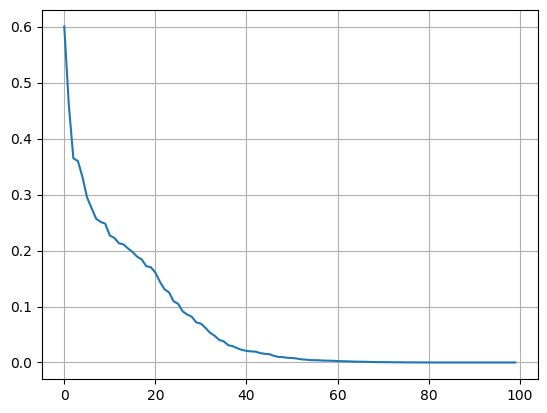

In [13]:
# Let's first have a look at the filter factor
lambda = 10  # then 1 and 0.1
lamByS = lambda ./ s.S
f = 1 ./ (lamByS.^2 .+ 1)
plot(f);
grid()
# It looks like a smooth truncation of singular values

We now look at the weighting functions
$$ \frac{s_i}{s_i^2+\lambda^2} = \frac{f_i}{s_i} $$
in comparison to the SVD weighting functions $1/s_i$

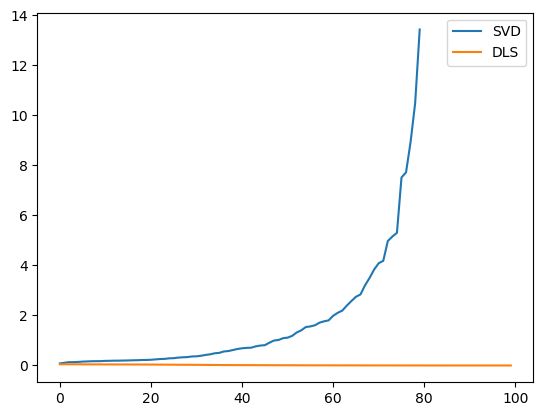

In [14]:
plot(1.0 ./ s.S[1:80], label="SVD")
plot(f ./ s.S, label="DLS")
legend();

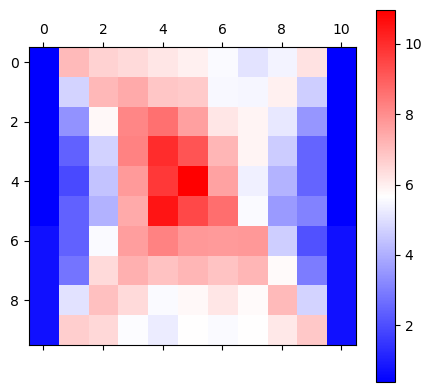

In [15]:
# Let's compute some solutions with different lambda
lambda = 10  # then 1, 0.1, 0.01
nM = size(G, 2)
GT = transpose(G)
model[:] = inv(GT * G + Matrix(I, nM, nM) * lambda^2) * (GT * d)
matshow(model)
colorbar();

### Task Part B - damped least squares
1. Create a logarithmically equidistant lambda vector
2. Do an interactive plotting (like above for pinv)
3. Plot the same quantities as above (model norm, residual norm) over $\lambda$ and against each other.
4. Which $\lambda$ do you choose according to the discrepancy principle?
5. Repeat with the same noise levels as above (try use same data).
6. Compute the resolution matrix and compare to TSVD

## Task Part C - Smoothness constraints
Define a roughness operator (see talk), e.g.: 
- How many model boundaries are in the model? Define a zero matrix!
- Run through all cells with a right neighbor and insert a -1 and a +1
- Run through all cells with a lower neighbor and insert a -1 and a +1
Replace the identity matrix by this matrix and repeat the previous steps (damped least squares) by using smoothness constraints.